In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.isna().sum().sum()

6965

In [8]:
nan_per = train.isna().sum() / train.isna().count()
nan_per.sort_values(ascending = False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [9]:
na_drop = train.loc[:,nan_per > 0.5].columns
list(na_drop)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
cr = train.corr()
uncorr_features = cr['SalePrice'][cr['SalePrice'] > -0.05]
uncorr_features = uncorr_features[uncorr_features < 0.05]
uncorr_features

Id             -0.021917
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
3SsnPorch       0.044584
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [11]:
list(uncorr_features.index)

['Id',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

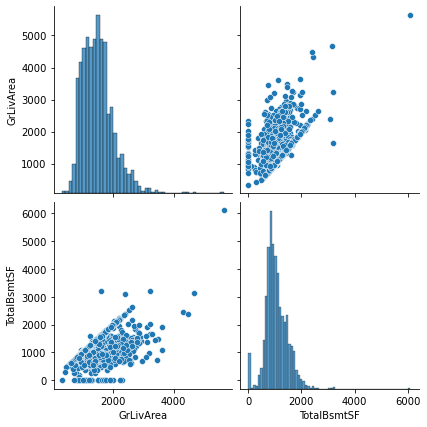

In [12]:
col = ['GrLivArea','TotalBsmtSF']
sns.pairplot(train[col],height = 3)

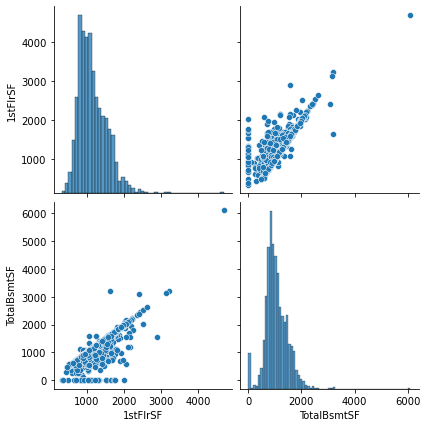

In [13]:
col = ['1stFlrSF','TotalBsmtSF']
sns.pairplot(train[col],height = 3)

In [14]:
train = train.drop(list(uncorr_features.index),axis = 1)

In [15]:
train = train.drop(list(na_drop),axis = 1)

In [16]:
train.shape

(1460, 69)

In [17]:
train.isna().sum().sum()

1558

In [18]:
n_columns = train.select_dtypes(include = np.number)
list(n_columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

In [19]:
c_columns = train.select_dtypes(exclude = np.number)
list(c_columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [20]:
for x in n_columns:
    train[x] = np.where(train[x].isna(),train[x].median(),train[x])
for x in c_columns:
    train[x] = np.where(train[x].isna(),"Unknown",train[x])

In [21]:
train.isna().sum().sum()

0

In [23]:
test = pd.read_csv("test.csv")

In [24]:
test = test.drop(list(na_drop),axis =1)
test = test.drop(list(uncorr_features.index),axis = 1)

In [25]:

for x in c_columns:
    test[x] = np.where(test[x].isna(),"Unknown",test[x])

In [26]:
n_colums = n_columns.columns.drop('SalePrice')

In [27]:

for x in n_colums:
    test[x] = np.where(test[x].isna(),test[x].median(),test[x])

In [28]:
test.isna().sum().sum()

0

In [29]:
test.describe(include = "all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
count,1459.000000,1459,1459.000000,1459.000000,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459
unique,NaN,6,NaN,NaN,2,4,4,2,5,3,...,5,6,3,NaN,NaN,NaN,NaN,NaN,10,6
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,934,1311,1457,1081,1396,...,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.334476,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93.174777,48.313914,24.243317,17.064428,1.744345,NaN,NaN
std,42.746880,NaN,20.569211,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.744882,68.883364,67.227765,56.609763,30.491646,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,20.000000,NaN,60.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,28.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,70.000000,NaN,78.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,168.000000,72.000000,0.000000,0.000000,0.000000,NaN,NaN


In [30]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,140.0,0.0,0.0,120.0,0.0,WD,Normal
1,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,WD,Normal
2,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,WD,Normal
3,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,WD,Normal
4,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,Gtl,...,TA,TA,Y,0.0,82.0,0.0,144.0,0.0,WD,Normal


In [31]:
target = np.log(train['SalePrice'])

In [32]:
train = train.drop('SalePrice',axis = 1)

In [33]:
train['train'] = 1
test['train'] = 0

In [34]:
combined = pd.concat([train,test])

In [35]:
for x in c_columns:
    df = pd.get_dummies(combined[x])
    combined = combined.drop(x,axis = 1)
    combined = pd.concat([combined,df],axis = 1)

In [36]:
combined

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,New,Oth,Unknown,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
traindf = combined[combined["train"] == 1]
testdf = combined[combined["train"] == 0]
traindf.drop(["train"],axis=1,inplace = True)
testdf.drop(["train"],axis=1,inplace = True)

C:\Users\Brandon Voigt\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
traindf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,New,Oth,Unknown,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,589.0,...,0,0,0,1,0,0,0,0,1,0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,877.0,...,0,0,0,1,0,0,0,0,1,0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
testdf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,New,Oth,Unknown,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
y = target
X = traindf

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=9)

In [42]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 500)

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
lr.score(X_test,y_test)

0.9068201333378653

In [45]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [46]:
rf.score(X_test,y_test)

0.8757911073220341

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor(n_estimators = 500,loss = 'lad')

In [48]:
gr.fit(X_train,y_train)

GradientBoostingRegressor(loss='lad', n_estimators=500)

In [49]:
gr.score(X_test,y_test)

0.903509916209701

In [50]:
pred = gr.predict(testdf)

In [51]:
pred = np.exp(pred)

In [52]:
test1 = pd.read_csv("test.csv")

In [53]:
output=pd.DataFrame({'Id':test1['Id'],'SalePrice':pred})
output.to_csv("submission.csv",index=False)